**Taller #1**

**Juan Jacobo González Herrera (1006228229)**

#**2.1 A Geometric Way of Thinking**

In [98]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

def step_euler(y,h,f):
  next_y=y+h*f(y)
  return next_y


def euler (h,f,y_0,start_t,end_t):
  N= int((end_t - start_t)/h)
  t_list=np.linspace(start_t,end_t,N+1)
  y_list=np.zeros(N+1)
  y_list[0]=y_0
  for i in range(0,N):
    y_list[i+1]=step_euler(y_list[i],h,f)

  return t_list,y_list

Para los ejercicios 2.1.1 y 2.1.3, interpretar $\dot{x}=\sin{x}$ como un flujo en la línea.

##2.1.1 Hallar todos los puntos fijos del flujo

\begin{equation} 
sin(x)=0\\
x= n\pi, n\in\mathbb Z\\
\frac{dx}{dt}=sin(x)\\
t=\int\ csc(x)dx\\
t=\int\ csc(x)(csc(x)+cot(x))csc(x)+cot(x)dx\\
t=\int\ csc2(x)+cot(x)csc(x)csc(x)+cot(x)dx \\
sustitucion:\\
u=csc(x)+cot(x)\ \\
\longrightarrow\ \frac{du}{dx}=-{csc}^2(x)-cot(x)csc(x)\\
\longrightarrow\ dx=1-{csc}^2(x)-cot(x)csc(x)du\\
t=-\int1/udu\\
t=-ln(u)\\
t=-ln(csc(x)+cot(x))\\
x=\frac{1}{2} i e^{-i x} - \frac{1}{2} i e^{i x}
\end{equation}

Busqueda de puntos fijos
\begin{equation}
\dot{x}=sin(x)\\
\ddot{x}=cos(x)\\
\end{equation}
Buscamos los puntos $x^{*}$ 
\begin{equation}
sin(x^{*})=0\\
x^{*}_{1}=2\pi n,\:x^{*}_{2}=\pi +2\pi n
\end{equation}
Luego

$\ddot{x}(x^{*}_{1})=cos(2\pi n)=1 \rightarrow$ punto fijo inestable\
$\ddot{x}(x^{*}_{2})=cos(\pi+2\pi n)=-1 \rightarrow$ punto fijo estable

Luego hay puntos fijos infinitos.

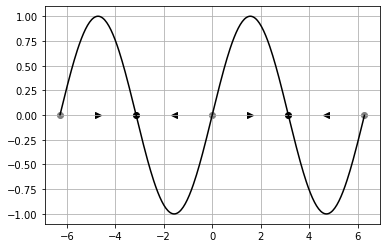

In [99]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-2*3.14, 2*3.14, 300)
y=np.sin(x)
plt.plot(x, y, color='black')
plt.grid()
plt.scatter(0,0,color='grey', marker='o')
plt.scatter(3.14*0.5,0, color='black', marker='>')
plt.scatter(3.14,0, color='black', marker='o')
plt.scatter(-3.14*0.5,0, color='black', marker='<')
plt.scatter(-3.14,0, color='black', marker='o')
plt.scatter(3.14+3.14*0.5,0, color='black', marker='<')
plt.scatter(2*3.14,0, color='grey', marker='o')
plt.scatter(2*-3.14,0, color='grey', marker='o')
plt.scatter(-3.14-3.14*0.5,0, color='black', marker='>')
plt.grid(True)

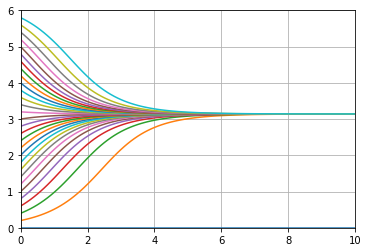

In [100]:
def Ejemplo2_11(x):
  dx=np.sin(x)
  return dx
y_0=0
h=0.1
t_0=0
t_N=10
for i in np.arange(0,6,0.2):
  t_list,y_list=euler(h,Ejemplo2_11,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')

plt.grid()
plt.axis([0,10,0,6])

Analizando la gráfica, se nota que el método converge a los múltiplos de $\pi$ y a 0, indicando los puntos fijos.

##2.1.3 
##a) Hallar la aceleración $\ddot{x}$ del flujo como una función de $x$.

##b) Hallar los puntos donde el flujo tiene aceleración positiva máxima.

$$\dot{x}=sin(x)$$
$$\ddot{x}=cos(x)\dot{x}$$
$$\ddot{x}=cos(x)sin(x)$$

Teniendo en cuenta la identidad trigonométrica
$$
\frac{1}{2}sin(2x)=sin(x)cos(x)
\\
\ddot{x}=\frac{1}{2}sin(2x)
$$
Luego, la ecuación seno tiene la máxima aceleración en:
$$
x=\left(z+\frac{1}{4}\right)\pi, \;\;\; z\in \mathbb{Z}
$$
Luego la máxima aceleración positiva está en:
$$
x=\left(2z+\frac{1}{4}\right)\pi, \;\;\; z\in \mathbb{Z}
$$

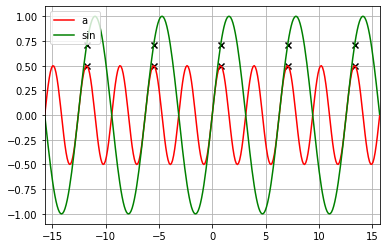

In [101]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-5*3.14, 5*3.14, 300)
y=np.sin(x)*np.cos(x)
z=np.sin(x)
plt.plot(x, y, color='r', label='a')
plt.plot(x, z, color='g', label='sin')
plt.grid()

for i in range(-15,15,1):
  plt.scatter(((2*i+1/4)*np.pi),0.5,color='black', marker='x')
  plt.scatter((2*i+1/4)*np.pi,np.sin((2*i+1/4)*np.pi),color='black', marker='x')

plt.axis([-5*3.14, 5*3.14,-1.1,1.1])
plt.legend()
plt.grid(True)

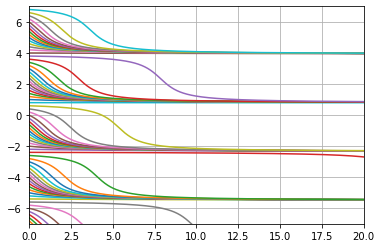

In [102]:
def Ejemplo2_13(x):
  dx=-0.5+np.sin(x)*np.cos(x) #Bajo la gráfica 0.5 unidades para que me marque los puntos máximos de aceleración en 0 y así funcione el método Euler.
  return dx
y_0=0
h=0.01
t_0=0
t_N=20
for i in np.arange(-7,7,0.2):
  t_list,y_list=euler(h,Ejemplo2_13,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')


plt.grid()
plt.axis([0,20,-7,7])

##2.1.5 (Un análogo mecánico)
##a) Hallar un sistema mecánico que esté aproximadamente gobernado por $\dot{x}=\sin{x}$.

##b) Usando intuición física, explicar porque ahora es obvio que $x^*=0$ es un punto fijo inestable y $x^*=\pi$ es estable.

a) Un péndulo sumergido en algún líqudo viscoso (por ejemplo miel, aceite, etc.).
Observando el péndulo, en la posición $90°$ sería $x=0$ y así sería una función similar a $\dot{x}=\sin{x}$. La fuerza cerca de la posición de $90°$ es pequeña, es más grande en $180°$ y vuelve a ser pequeña en $-90°$

b) Tomando en cuenta la gravedad, es obvio que en  $x=0$  hay un punto fijo inestable porque con cualquier desequilibrio el péndulo se moverá (está arriba). En  $x=π$  hay un punto fijo estable porque el péndulo está abajo del todo. 

**NOTA: La gráfica y simulación se encuentran en el punto 2.1.1**

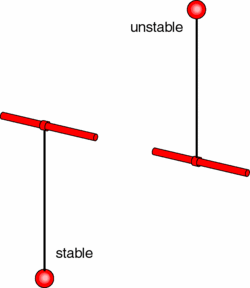

#**2.2 Fixed Points and Stability**

Analizar las siguientes ecuaciones graficamente. En cada caso, bosquejar el campo vectorial en la linea real, luego encontrar todos los puntos fijos, clasificar su estabilidad y bosquejar el gráfico de $x(t)$ para condiciones iniciales diferentes. Luego intentar obtener una solución analítica de $x(t)$; tomar en cuenta que en muchos casos es imposible obtener la ecuación en forma cerrada.

##2.2.1 $\dot{x}=4x^2-16$

$$
dt=\frac{dx}{4x^2-16}
\\
t=\int{\frac{1}{4x^2-16}dx}
\\
\int{\frac{1}{x^2-4}}dx=\int{4}dt
\\
\frac{1}{4}\ln{\left(\frac{x-2}{x+2}\right)}=4t+C_1
\\
x=2\frac{1+C_2e^{16t}}{1-C_2e^{16t}}
\\
C_2(t=0)=\frac{x-2}{x+2}
$$
Luego hay dos puntos:

$x_1^*=-2$ (Estable) y $x_2^*=2$ (Inestable)


Text(0, 0.5, 'x´')

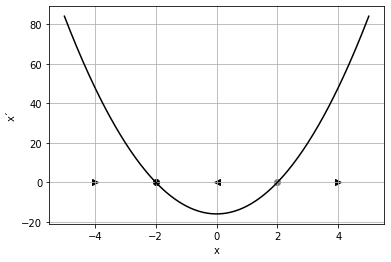

In [103]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-5, 5, 300)
d_x=np.zeros(len(x))

def Ejemplo2_21(x):
  dx=4*x**2-16
  return dx

dx=Ejemplo2_21(x)

plt.plot(x,dx, color='black')
plt.grid()

plt.scatter(-2,0,color='black', marker='o')
plt.scatter(2,0,color='grey', marker='o')
plt.scatter(-4,0,color='black', marker='>')
plt.scatter(0,0,color='black', marker='<')
plt.scatter(4,0,color='black', marker='>')

plt.xlabel('x')
plt.ylabel('x´')

<ipython-input-103-2138947b4296>:9: RuntimeWarning: overflow encountered in double_scalars
  dx=4*x**2-16


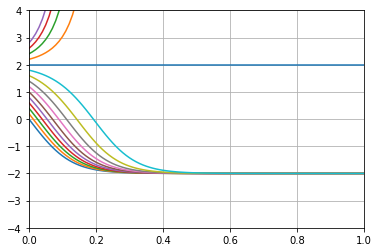

In [104]:
y_0=0
h=0.01
t_0=0
t_N=10
for i in np.arange(0,3,0.2):
  t_list,y_list=euler(h,Ejemplo2_21,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')


plt.grid()
plt.axis([0,1,-4,4])

##2.2.3 $\dot{x}=x-x^3$

$$
dt=\frac{dx}{x(1-x^2)}
\\
t=\int{\frac{1}{x(1-x^2)}dx}
\\
t=\int{\frac{1}{x}}dx+\frac{1}{2}\int{\frac{1}{1-x}}dx-\frac{1}{2}\int{\frac{1}{1+x}}dx
\\
x=\pm \frac{Ce^t}{\sqrt{1+C^2e^{2t}}}
\\
C(t=0)=\frac{x}{\sqrt{1-x^2}}
$$
Luego hay tres puntos:

$x_1^*=\pm1$ (Estable) y $x_2^*=0$ (Inestable)


Text(0, 0.5, 'x´')

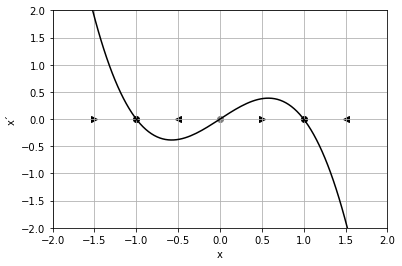

In [105]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-5, 5, 300)
d_x=np.zeros(len(x))

def Ejemplo2_23(x):
  dx=x-x**3
  return dx

dx=Ejemplo2_23(x)

plt.plot(x,dx, color='black')
plt.grid()
plt.axis([-2,2,-2,2])
plt.scatter(-1,0,color='black', marker='o')
plt.scatter(0,0,color='grey', marker='o')
plt.scatter(1,0,color='black', marker='o')

plt.scatter(-0.5,0,color='black', marker='<')
plt.scatter(0.5,0,color='black', marker='>')

plt.scatter(-1.5,0,color='black', marker='>')
plt.scatter(1.5,0,color='black', marker='<')

plt.xlabel('x')
plt.ylabel('x´')

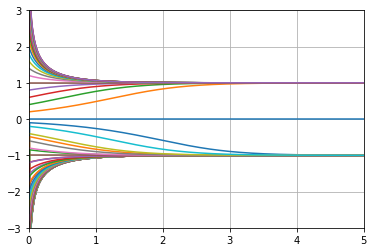

In [106]:
y_0=0
h=0.01
t_0=0
t_N=10
for i in np.arange(-10,5,0.2):
  t_list,y_list=euler(h,Ejemplo2_23,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')


plt.grid()
plt.axis([0,5,-3,3])

##2.2.5 $\dot{x}=1+\frac{1}{2}\cos{x}$

Sustituyendo $s=tan(\frac{x}{2})$ y obteniendo:
$$
\cos{x}=\frac{1-s^2}{1+s^2}
\\
dx=\frac{2}{1+s^2}ds
$$
Insertando e integrando:
$$
\int{dt}=t+C=\int{\frac{1}{1+\frac{1}{2}\cos{x}}}dx
\\
t=\int{\frac{1}{1+\frac{1}{2}\frac{1-s^2}{1+s^2}}\cdot \frac{2}{1+s^2}}ds
\\
t=\frac{2}{\sqrt{1^2-\frac{1}{2}^2}}\arctan{\left(\frac{\sqrt{1-\frac{1}{2}}}{\sqrt{1+\frac{1}{2}}}tan\left(\frac{x}{2}\right)\right)}
\\
x=2\arctan{\left(\sqrt{3}\tan{\left(\frac{\sqrt{3}}{4}(t+C)\right)}\right)}
\\
C(t=0)=\frac{4}{\sqrt{3}}\arctan{\left(\frac{1}{\sqrt{3}}\tan{\frac{x}{2}}\right)}
$$

Luego, analizando la fórmula, no se encuentran puntos fijos

Text(0, 0.5, 'x´')

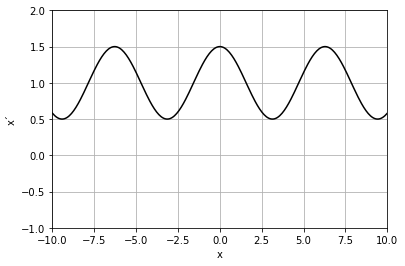

In [107]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-10,10, 300)
d_x=np.zeros(len(x))

def Ejemplo2_25(x):
  dx=1+0.5*np.cos(x)
  return dx

dx=Ejemplo2_25(x)

plt.plot(x,dx, color='black')
plt.grid()
plt.axis([-10,10,-1,2])


plt.xlabel('x')
plt.ylabel('x´')

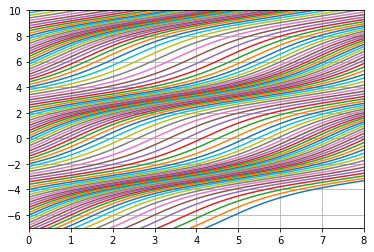

In [108]:
y_0=0
h=0.01
t_0=0
t_N=10
for i in np.arange(-10,10,0.2):
  t_list,y_list=euler(h,Ejemplo2_25,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')


plt.grid()
plt.axis([0,8,-7,10])

#**2.3 Population Growth**

##2.3.1 (Solución exacta de ecuación logística). Hay dos formas de resolver la ecuación logística $\dot{N}=rN(1-N/K)$ analíticamente para una condición inicial arbitraria $N_0$.
## a) Separar variables e integrar, usando fracciones parciales.
## b) Hacer un cambio de variable $x=1/N$. Luego derivar y resolver la ecuación diferencial resultante para $x$.

Método a:
$$
rN\left(1-\frac{N}{K}\right)=rN-\frac{rN^2}{K}=\frac{rKN-rN^2}{K}=\frac{r}{K}\left(KN-N^2\right)
\\
\dot{N}=\frac{dN}{dt}=\frac{r}{K}\left(KN-rN^2\right)
\\
\frac{dN}{KN-N^2}=\frac{r}{K}dt
\\
\frac{1}{KN-N^2}=\frac{1}{KN}-\frac{1}{K(N-K)}
\\
\int{\frac{dN}{KN-N^2}}=\int{\frac{dN}{KN}}-\int{\frac{dN}{K(N-K)}}=\frac{1}{K}\ln{(N)}-\frac{1}{K}\ln{(N-K)}=\int{\frac{r}{K}}dt=\frac{r}{K}t+C
\\
\frac{1}{K}\ln{(N)}-\frac{1}{K}\ln{(N-K)}=\frac{r}{K}t+C
\\
\ln{N}-\ln{(N-K)}=rt+KC
\\
\ln{\left(\frac{N}{N-K}\right)}=rt+KC
\\
-\ln{\left(\frac{N}{N-K}\right)}=\ln{\left(\frac{N-K}{N}\right)}=\ln{\left(1-\frac{K}{N}\right)}=rt-KC
\\
1-\frac{K}{N}=e^{-rt-KC}=e^{-KC}e^{-rt}
\\
1-e^{-KC}e^{-rt}=\frac{K}{N}
\\
N(t)=\frac{K}{1-e^{-KC}e^{-rt}}
\\
N(0)=\frac{K}{1-e^{-KC}}=N_0 \rightarrow e^{-KC}=1-\frac{K}{N_0}
\\
N(t)=\frac{K}{1-(1-\frac{K}{N_0})e^{-rt}}
$$

Método b:
$$
N=\frac{1}{x} \rightarrow \dot{N}=-\frac{\dot{x}}{x^2}=r\frac{1}{x}\left(1-\frac{1}{xK}\right)
\\
\dot{x}=\frac{r}{K}-rx
\\
x(t)=Ce^{-rt}+\frac{1}{K} \rightarrow \frac{1}{N(t)}=Ce^{-rt}+\frac{1}{K}=\frac{KCe^{-rt}+1}{K}
\\
N(t)=\frac{K}{KCe^{-rt}+1}
\\
N(0)=N_0 \rightarrow N(t)=\frac{K}{1-(1-\frac{K}{N_0})e^{-rt}}
$$

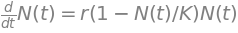

In [109]:
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

sym.init_printing()
t, r, K = sym.symbols('t r K')
N = sym.Function('N')(t)
dNdt = N.diff(t)
expr = sym.Eq(dNdt, r*N*(1-N/K))
expr


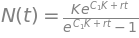

In [110]:
sym.dsolve(expr)

[0.0, 10.0000000000000]


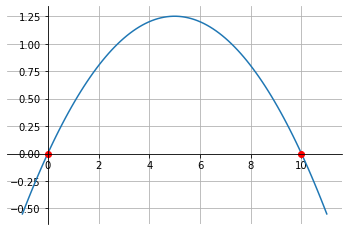

In [111]:
x=np.linspace(-1,11,100)
r=0.5
K=10
x_dot=r*x*(1-x/K)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.plot(x,x_dot)

#plt.axis([-10, 20, -5, 5])

plt.grid()


x=sym.symbols('x')
x_dot1=r*x*(1-x/K)
roots=sym.solve(x_dot1)
print(roots)
for j in range(len(roots)):
  plt.plot(roots[j],0,'ro')

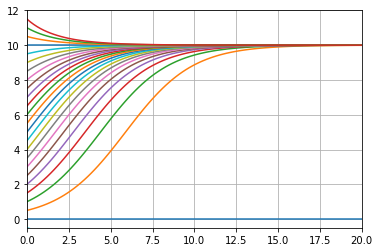

In [112]:
def Ejemplo2_31 (t,x,r,K):

  return 0.5*x*(1-x/10)
  


ti=0; tf=20; dt=100
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(-5,12,0.5):
  sol=solve_ivp(Ejemplo2_31,tspam,[x0],args=(r,K),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -0.5, 12])
plt.grid()


##2.3.3 (Crecimiento de tumor). El crecimiento de un tumor cancerígino puede ser modelado por la ley de Gompertz $\dot{N}=-aN\ln{bN}$, donde $N(t)$ es proporcional al número de células en el tumor y $a,b>0$ son parámetros.

##a) Interpretar $a$ y $b$ biológicamente.
##b) Bosquejar el campo vectorial y luego graficar $N(t)$ para varios valores iniciales.

a) La constante $a$ puede ser interpretada como la velocidad del crecimiento del tumor y la constante $b$ especifica la relación inversa del tamaño estable del tumor.

[0, 1]
[0.0, 0.500000000000000]
[0, 1/3]


<ipython-input-113-05ab006acaad>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(roots2[j],0,'ro', color='g')
<ipython-input-113-05ab006acaad>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(roots3[j],0,'ro', color='y')


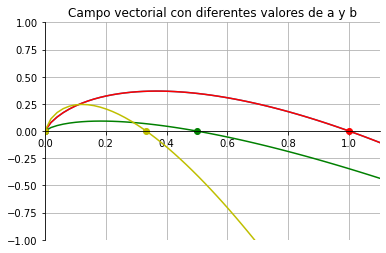

In [113]:
#Bosquejo del campo vectorial (punto b)
import sympy as sym
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np
from sympy.matrices.matrices import log
from sympy.algebras.quaternion import ln

x=np.linspace(0.00001,2,100)
a,b = sym.symbols('a b')
a=1
b=1
n_dot=-a*x*np.log(b*x)
n_dota=-0.5*x*np.log(2*x)
n_dotb=-2*x*np.log(3*x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.title('Campo vectorial con diferentes valores de a y b')
plt.plot(x,n_dot)

plt.plot(x,n_dot, color='r', label='a=1,b=1')
plt.plot(x,n_dota, color='g', label='a=0.5,b=2')
plt.plot(x,n_dotb, color='y', label='a=2,b=3')


plt.xlim(0,1.1)
plt.ylim(-1,1)
plt.grid()


x=sym.symbols('x')
n_dot1=-a*x*sym.log(b*x)
n_dot2=-0.5*x*sym.log(2*x)
n_dot3=-2*x*sym.log(3*x)
roots=sym.solve(n_dot1)
roots2=sym.solve(n_dot2)
roots3=sym.solve(n_dot3)
print(roots)
print(roots2)
print(roots3)
for j in range(len(roots)):
  plt.plot(roots[j],0,'ro')
  plt.plot(roots2[j],0,'ro', color='g')
  plt.plot(roots3[j],0,'ro', color='y')

<ipython-input-114-5895223ff75a>:10: RuntimeWarning: invalid value encountered in log
  return -1*x*np.log(1*x)


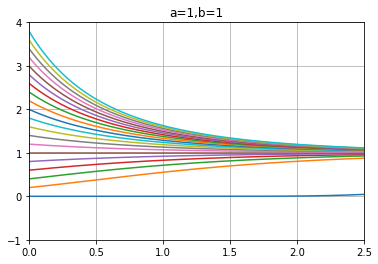

<ipython-input-114-5895223ff75a>:22: RuntimeWarning: invalid value encountered in log
  return -0.5*x*np.log(2*x)


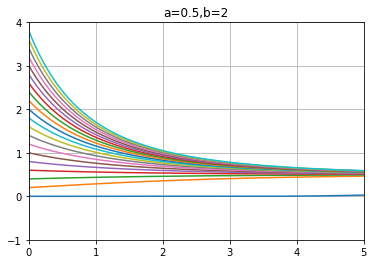

<ipython-input-114-5895223ff75a>:34: RuntimeWarning: invalid value encountered in log
  return -2*x*np.log(3*x)


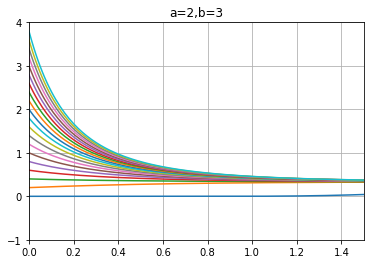

In [114]:
#Grafica de N(t) para varios valores iniciales

y_0=0
h=0.01
t_0=0
t_N=10

def Ejercicio2_33a (x):

  return -1*x*np.log(1*x)
  

for i in np.arange(-4,4,0.2):
  t_list,y_list=euler(h,Ejercicio2_33a,i,t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')
plt.title('a=1,b=1')  
plt.grid()
plt.axis([0,2.5,-1,4])
plt.show()

def Ejercicio2_33b (x):
  return -0.5*x*np.log(2*x)

for i in np.arange(-4,4,0.2):
  t_list,y_list=euler(h,Ejercicio2_33b,i,t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')
plt.title('a=0.5,b=2')
plt.grid()
plt.axis([0,5,-1,4])  
plt.show()


def Ejercicio2_33c (x):
  return -2*x*np.log(3*x)

for i in np.arange(-4,4,0.2):
  t_list,y_list=euler(h,Ejercicio2_33c,i,t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')
plt.title('a=2,b=3')
plt.grid()
plt.axis([0,1.5,-1,4])
plt.show()





##2.3.5 (Dominación del más apto). Suponer que $X$ y $Y$ son dos especies que se reproducen exponencialmente rápido: $\dot{X}=aX$ y $\dot{Y}=bY$, respectivamente, con condiciones iniciales $X_0,Y_0>0$ y tazas de crecimiento $a>b>0$. Aquí, $X$ es "más apto" que $Y$ en el sentido de que se reproduce más rápido, reflejado por la desigualdad $a>b$. Así que se esperaría que $X$ siga incrementando su aporte a la población total $X+Y$ mientras $t\rightarrow\infty$. El objetivo de este ejercicio es demostrar este resultado intuitivo analíticamente y luego geométricamente.

##a) Suponer que $x(t)=X(t)/[X(t)+Y(t)]$ para denotar el aporte de $X$ a la población total. Al resolver para $X(t)$ y $Y(t)$, mostrar que $x(t)$ incrementa monótonamente y se acerca a 1 cuando $t\rightarrow\infty$.

##b) Alternativamente, podemos llegar a la misma conclusión derivando una ecuación diferencial para $x(t)$. Para esto, tomar la derivada del tiempo de $x(t)=X(t)/[X(t)+Y(t)]$ usando las reglas del cociente y de la cadena. Luego sustituir para $\dot{X}$ y $\dot{Y}$ y mostrar que $x(t)$ obedece la ecuación logística $\dot{x}=(a-b)x(1-x)$. Explicar por qué esto implica que $x(t)$ incrementa monótonamente y se acerca a 1 cuando $t\rightarrow\infty$.

a) 
$$
\frac{dX}{dt}=aX, X(0)=X_0
\\
ln|X|=at+C_1
\\
X(t)=A_1e^{at}
$$

Valores iniciales para Y

$$
\frac{dY}{dt}=aY, Y(0)=Y_0
\\
ln|Y|=at+C_1
\\
Y(t)=A_2e^{bt}
$$

Resolviendo las poblaciones
$$
x(t)=\frac{X_0}{X_0+Y_0e^{(b-a)t}}
$$
como $b-a <0$, se obtiene
$$
\lim_ {t \to ∞} x(t)= \frac{X0}{X0}=1
$$

b)
$$
\frac{d}{dt}[x(t)]=\frac{d}{dt}[\frac{X(t)}{X(t)+Y(t)}]
$$
Resolviendo se obtiene
$$
\dot{x}=(a-b)\frac{X(t)}{X(t)+Y(t)}\frac{Y(t)}{X(t)+Y(t)}
\dot{x}=(a-b)x(1-x)
$$
Luego, si t tiende a infinito las especies de X alcanzan el equilibrio
$$
(a-b)x^*(1-x^*)=0
\\
x^*=0
\\
x^*=1
$$
de acuerdo con $0<x(0)<1$ y $a-b>0$, $\dot{x}$ es siempre positivo, esto significa que crece monótonamente.

Esto también representa la ecuación logística con $r=a-b>0$ y $K=1$, luego como toda ecuación logística, $x(t)$ crece monótonamente.

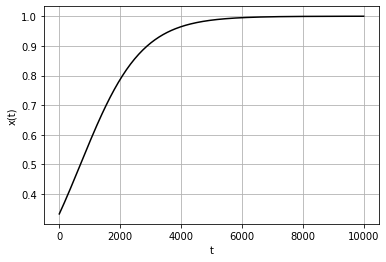

In [115]:
#Graficando el aporte de X a la población total con valores definidos
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np
#Valores iniciales mayores a 0
X0=1
Y0=2
#Tasas de crecimiento a>b>0
a=0.002
b=0.001



x=np.linspace(0,10000, 300)
y=X0/(X0+Y0*np.exp((b-a)*x))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(x, y, color='black')

plt.grid()

plt.grid(True)



Analizando la gráfica, cuando t es muy grande, la función se acerca a 1, naturalmente la velocidad con que se acerca a 1 depende de la velocidad de crecimiento de ambas poblaciones.

#**2.4 Linear Stability Analysis**

Usar análisis de estabilidad lineal para clasificar los puntos fijos en los siguientes sistemas. 
Si el análisis de estabilidad lineal falla porque $f'(x^*)=0$, usar un argumento gráfico para decidir la estabilidad.

##2.4.1 $\dot{x}=x(1-x)$

$\dot{x}=x(1-x)$

$\frac{d\dot{x}}{dx}=1-2x$

$\frac{d\dot{x}}{dx}(0)=1 \rightarrow$ Punto fijo inestable

$\frac{d\dot{x}}{dx}(1)=-1 \rightarrow$ Punto fijo estable

Text(0, 0.5, 'x´')

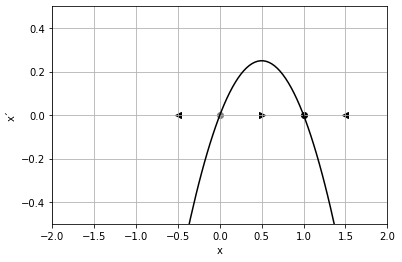

In [116]:
x=np.linspace(-5, 5, 300)
d_x=np.zeros(len(x))

def Ejemplo2_41(x):
  dx=x*(1-x)
  return dx

dx=Ejemplo2_41(x)

plt.plot(x,dx, color='black')
plt.grid()

plt.scatter(0,0,color='grey', marker='o')
plt.scatter(-0.5,0, color='black', marker='<')
plt.scatter(1,0, color='black', marker='o')
plt.scatter(0.5,0, color='black', marker='>')
plt.scatter(1.5,0, color='black', marker='<')

plt.axis([-2,2,-0.5,0.5])
plt.xlabel('x')
plt.ylabel('x´')

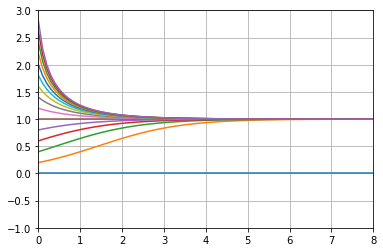

In [117]:
y_0=0
h=0.1
t_0=0
t_N=10
for i in np.arange(0,3,0.2):
  t_list,y_list=euler(h,Ejemplo2_41,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')

plt.grid()
plt.axis([0,8,-1,3])

##2.4.3 $\dot{x}=\tan{x}$

$\dot{x}=tan(x)$

$\frac{d\dot{x}}{dx}=\sec^2{(x)}$

$\frac{d\dot{x}}{dx}(\pi z)=1\rightarrow$ Pinto fijo inestable $z\in \mathbb{Z}$

Debido a la discontinuidad de $tan(x)$, los demas posibles puntos fijos no pueden ser considerados verdaderamente como puntos fijos.

Text(0, 0.5, 'x´')

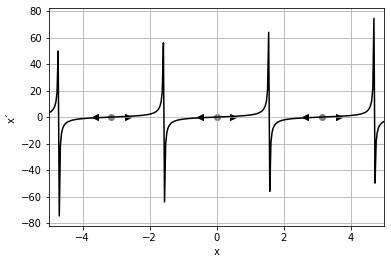

In [118]:
x=np.linspace(-5, 5, 300)
d_x=np.zeros(len(x))

def Ejemplo2_43(x):
  dx=np.tan(x)
  return dx

dx=Ejemplo2_43(x)

plt.plot(x,dx, color='black')
plt.grid()

plt.scatter(3.1416,0,color='grey', marker='o')
plt.scatter(3.1416+0.5,0, color='black', marker='>')
plt.scatter(3.1416-0.5,0, color='black', marker='<')

plt.scatter(0,0,color='grey', marker='o')
plt.scatter(0+0.5,0, color='black', marker='>')
plt.scatter(0-0.5,0, color='black', marker='<')

plt.scatter(-3.1416,0,color='grey', marker='o')
plt.scatter(-3.1416+0.5,0, color='black', marker='>')
plt.scatter(-3.1416-0.5,0, color='black', marker='<')

plt.xlim(-5,5)
plt.xlabel('x')
plt.ylabel('x´')

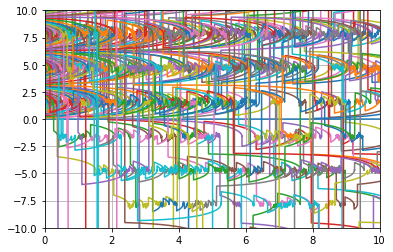

In [119]:
y_0=0
h=0.001
t_0=0
t_N=10
for i in np.arange(0,10,0.1):
  t_list,y_list=euler(h,Ejemplo2_43,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')

plt.grid()
plt.axis([0,10,-10,10])

##2.4.5 $\dot{x}=1-e^{-x^2}$

$\dot{x}=1-e^{-x^2}$

$\frac{d\dot{x}}{dx}=2xe^{-x^2}$

$\frac{d\dot{x}}{dx}(0)=0\rightarrow$ Inconcluso

Text(0, 0.5, 'x´')

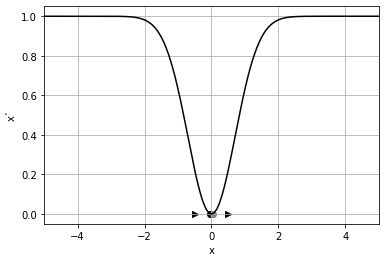

In [120]:
x=np.linspace(-5, 5, 300)
d_x=np.zeros(len(x))

def Ejemplo2_45(x):
  dx=1-np.exp(-x**2)
  return dx

dx=Ejemplo2_45(x)

plt.plot(x,dx, color='black')
plt.grid()

plt.scatter(-0.05,0,color='black', marker='o')
plt.scatter(0.05,0,color='grey', marker='o')
plt.scatter(0+0.5,0, color='black', marker='>')
plt.scatter(0-0.5,0, color='black', marker='>')


plt.xlim(-5,5)
plt.xlabel('x')
plt.ylabel('x´')

Luego hay un punto fijo en 0 que es estable en la izquierda e inestable en la derecha.

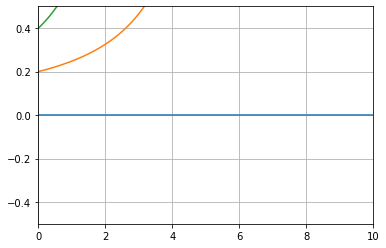

In [121]:
y_0=0
h=0.01
t_0=0
t_N=10
for i in np.arange(0,10,0.2):
  t_list,y_list=euler(h,Ejemplo2_45,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')

plt.grid()
plt.axis([0,10,-0.5,0.5])

#**2.8 Solving Equations on the Computer**

##2.8.1 (Campos de pendiente). La pendiente es constante a lo largo de las líneas horizontales en la figura. ¿Porqué deberíamos esperar esto?
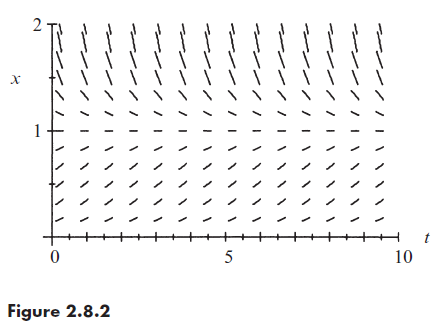

La pendiente es constante a lo largo de las líneas horizontales porque la ecuación para la pendiente $\dot{x}$ depende extrictamente de $x$ pero no de t. Aunque t varía a lo largo de las líneas horizontales, $x$ permanece constante, de tal modo que la pendiente permanecerá constante.

Text(0, 0.5, 'x´')

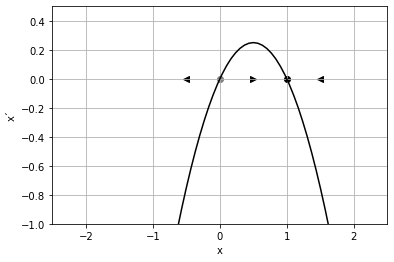

In [122]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-10,10, 300)
d_x=np.zeros(len(x))

def Ejemplo2_81(x):
  dx=x*(1-x)
  return dx

dx=Ejemplo2_81(x)

plt.plot(x,dx, color='black')
plt.grid()
plt.axis([-2.5,2.5,-1,0.5])


plt.scatter(0,0,color='grey', marker='o')
plt.scatter(-0.5,0, color='black', marker='<')
plt.scatter(1,0, color='black', marker='o')
plt.scatter(0.5,0, color='black', marker='>')
plt.scatter(1.5,0, color='black', marker='<')

plt.xlabel('x')
plt.ylabel('x´')

<ipython-input-122-162abbe7a9af>:9: RuntimeWarning: overflow encountered in double_scalars
  dx=x*(1-x)


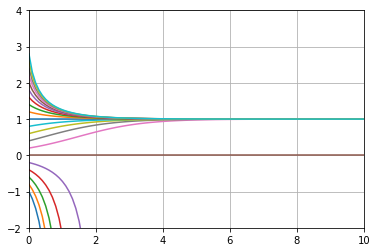

In [123]:
y_0=-0.1
h=0.1
t_0=0
t_N=10
for i in np.arange(-1,3,0.2):
  t_list,y_list=euler(h,Ejemplo2_81,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')

plt.grid()
plt.axis([0,10,-2,4])

##2.8.3 (Calibrando el método de Euler). El objetivo de este problema es probar el método de Euler en el problema de valor inicial $\dot{x}=-x, x(0)=1$.
##a) Resolver el problema analíticamente. ¿Cuál es el valor exacto de $x(1)$?
##b) Usando el método de Euler con tamaño de escalón $\Delta t=1$, estimar $x(1)$ numéricamente - nombrar el resultado $\hat{x}(1)$. Luego repetir usando $\Delta t=10^{-n}$, para $n=1,2,3,4$.
##c) Graficar el error $E=|{\hat{x}(1)-x(1)}|$ como función de $\Delta t$. Luego graficar $\ln{E}$ vs $\ln{t}$, explicar resultados.

a) $\dot{x}=-x,x(0)=1 \rightarrow x(t)=e^{-t}$$\;\;\;\;\;x(1)=e^{-1}=0.3678794412$

b)
$$
y_{n+1}=y_n+hg(y_n)
\\
\hat{x}(1)=x(0)-\Delta t\cdot x(0)
\\
\Delta t =10^0 \rightarrow \hat{x}(1)=x(0)-\Delta t\cdot x(0)=0
$$

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def step_euler(y,h,f):
  next_y=y+h*f(y)
  return next_y

def euler (h,f,y_0,start_t,end_t):
  N= int((end_t - start_t)/h) #Puntos que tomo en un tiempo determinado
  t_list=np.linspace(start_t,end_t,N+1) #Lista de tiempo, desde t_0 hasta t_f punto por punto (N+1)

  y_list=np.zeros(N+1) #Guardo en una lista los resultados en y

  y_list[0]=y_0

  for i in range(0,N):
    y_list[i+1]=step_euler(y_list[i],h,f)

  return t_list,y_list

In [126]:
def g(y): #Defino el sistema
  funcion=-y
  return funcion

y_0=1
t_0=0
t_N=1

elist = [None] * 5 #Guardo resultados en una lista
tlist= [None] * 5

elist[0]=0
tlist[0]=1
#Para delta t = 0.1

h=0.1
t_list,y_list=euler(h,g,y_0, t_0,t_N)

print('h=10^-1, x(1)=',y_list[-1])
x0_1=y_list[-1]
elist[1]=x0_1
tlist[1]=h
#Para delta t = 0.01

h=0.01
t_list,y_list=euler(h,g,y_0, t_0,t_N)

print('h=10^-2, x(1)=',y_list[-1])
x0_01=y_list[-1]
elist[2]=x0_01
tlist[2]=h

#Para delta t = 0.001

h=0.001
t_list,y_list=euler(h,g,y_0, t_0,t_N)

print('h=10^-3, x(1)=',y_list[-1])
x0_001=y_list[-1]
elist[3]=x0_001
tlist[3]=h

#Para delta t = 0.0001

h=0.0001
t_list,y_list=euler(h,g,y_0, t_0,t_N)

print('h=10^-4, x(1)=',y_list[-1])
x0_0001=y_list[-1]
elist[4]=x0_0001
tlist[4]=h

h=10^-1, x(1)= 0.3486784401
h=10^-2, x(1)= 0.3660323412732296
h=10^-3, x(1)= 0.36769542477096373
h=10^-4, x(1)= 0.36786104643292905


c) Graficando:

In [127]:
from matplotlib import pyplot as plt
x=0.3678794412
nlist= [None] * 5
i=0
while i < len(elist):
  nlist[i]=np.abs(elist[i]-x) #Aquí hallo el error
  i = i + 1

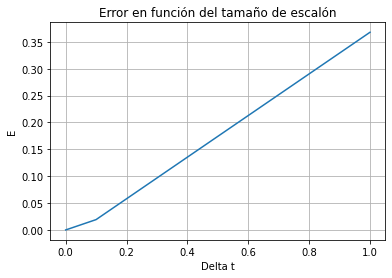

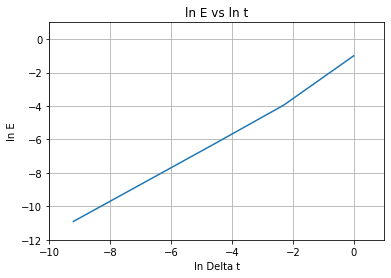

In [128]:
plt.title('Error en función del tamaño de escalón')
plt.plot(tlist, nlist)
plt.xlabel("Delta t")
plt.ylabel("E")
plt.grid()
plt.show()


plt.title('ln E vs ln t')
plt.plot(np.log(tlist), np.log(nlist))
plt.xlabel("ln Delta t")
plt.ylabel("ln E")
plt.grid()
plt.xlim(-10, 1)
plt.ylim(-12, 1)
plt.show()

Analizando los resultados, la pendiente es aproximadamente 1 para pequeños valores de $\Delta t$, lo que indica que el error del método es directamente proporcional a $\Delta t$, luego a menor tamaño de escalón, menor error.

Esto también se nota comparando los resultados de $\hat{x}$, los cuales se acercan más al resultado real mientras reduzco el tamaño del escalón.

También se puede decir que para tiempos pequeños como en este caso (de 0 a 1), es mejor tener un escalón muy pequeño, pero cuando se tienen tiempos muy grandes, el proceso puede llegar a ser demorado debido a los límites de cómputo.

##2.8.7 (Error estimado para método de Euler). En este problema, hay que usar expansiones de series de Taylor para estimar el error en tomar un escalón por el método de Euler. La solución exacta y la aproximación de Euler empiezan en $x=x_0$ cuando $t=t_0$. Se quiere comparar el valor exacto de $x(t_1)\equiv x(t_0+\Delta t)$ con la aproximación de Euler $x_1=x_0+f(x_0)\Delta t$.
##a) Expandir $x(t_1)=x(t_0+\Delta t)$ como series de Taylor en $\Delta t$, en términos de $O(\Delta t^2)$.
##b) Mostrar que el error local $|x(t_1)-x_1|\sim C(\Delta t^2)$ y de una expresión explícita para la constante $C$. (Generalmente uno está más interesado en el error global incurrido después de integrar sobre un intervalo de tiempo de tamaño fijo $T=n\Delta t$. Dado que cada escalón produce un error $O(\Delta t)^2$ y tomamos $n=T/\Delta t=O(\Delta t^-1)$ escalones, el error global $|x(t_n)-x_n|$ es $O(\Delta t)$, como lo dice el texto).

Tomando en cuenta la ecuación del método de Euler:
$$
x_{n+1}=x_n+Δtf(x_n)
$$

###a)
$$
x(t_0+Δt)=x(t_0)+Δt\dot{x}(t_0)+\frac{Δt^2}{2}\ddot{x}(\xi) \;\;\;\; \xi \in (t_0,t_0+\Delta t)
\\
=x(t_0)+Δt\dot{x}(t_0)+\frac{Δt^2}{2}f'(x(ξ))f(x(ξ))
$$

###b)
$$
|x(t_1)-x_1|=|x(t_0+Δt)-(x_0+Δtf(x_0))|=\frac{Δt^2}{2}|f'(x(ξ))f(x(ξ))|\leq O(Δt)^2
\\
O=max\left[\frac{|f'(x(ξ))f(x(ξ))|}{2}:ξ \in (t_0,t_0+Δt)\right]
$$

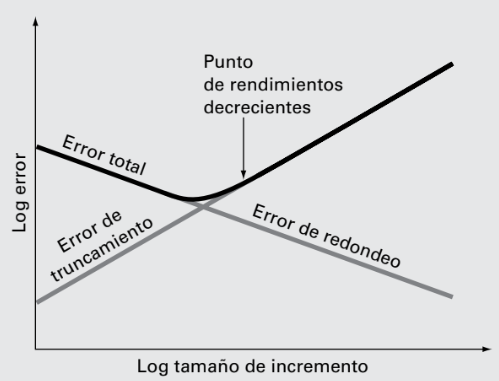

Representación gráfica de las relaciones entre el error de redondeo y el error de truncamiento. Se presenta el punto de regreso disminuido, donde el error de redondeo no muestra los beneficios de la reducción del tamaño del incremento.

Esto se simuló en el ejercicio 2.8.3, en donde se muestra como domina el error de truncamiento sobre el estimado. Probablemente con un tamaño de incremento mucho menor se empezaría a notar el efecto del error de redondeo.

